# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **I would choose Classification, as there are only 2 outcomes,viz. who needs early intervention and one who don't. Choosing between classification and Regression is done based on the output type.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = len(student_data)  #number of rows in the csv file

# TODO: Calculate number of features
n_features = (student_data.shape[1] - 1)   # Total number of columns - 1, since last column (passed) is a label

# TODO: Calculate passing students

n_passed = len(student_data[student_data['passed'] == 'yes'])   #number of "yes" present in column name "passed" in student_data

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed'] == 'no'])    #number of "no" present in column name "passed" in student_data

# TODO: Calculate graduation rate
grad_rate = (float(n_passed)/n_students) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
###import matplotlib.pyplot as plt
###%matplotlib inline
###from sklearn.preprocessing import LabelEncoder

# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

###pas = student_data ['passed']
###features = student_data.drop('passed', axis = 1)

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

print "Old Feature columns, with 30 features:\n{}".format(feature_cols)  #added to see the comparison

X_all = preprocess_features(X_all)
print "\nProcessed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))






##########################
##### visualize data #####
##########################

#new_label_1_0 = student_data['passed'] == 'Yes'
#new_label_map = {'yes': 1, 'no': 0}
#new_label_1_0 = student_data['passed'].map(new_label_map)
#print "\n Label converted to 1 and 0 and it is {}".format(new_label_1_0)

#import matplotlib.pyplot as plt
#%matplotlib inline
#pas = new_label_1_0
#features = X_all

#for col2 in features.columns[:]:
#    fig, ax = plt.subplots()
#    #fit = np.polyfit(features [col2],pas, deg=1) # Linear fit to compute the trendline
#    ax.scatter(features [col2],pas)
#    #ax.bar(features [col2],pas)
#    plt.plot(features [col2], pas, 'o', color='blue')
#    #ax.plot( features[col2], fit[0] * features[col2] + fit[1], color='blue', linewidth=1)  
#    plt.title('Passed Vs ' +str(col2)) # title 
#    plt.xlabel(col2) # x label 
#    plt.ylabel('Passed') # y label    

Old Feature columns, with 30 features:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Wal

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
#from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.24, train_size = 0.76, random_state=90, stratify = y_all)

# see the distribution of labels
print np.mean(y_train == 'no')
print np.mean(y_test == 'no')
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

0.33
0.326315789474
Training set has 300 samples.
Testing set has 95 samples.


Mean of number of labels with "no" in train and test sets with stratify is 0.327702702703 and 0.333333333333 respectively.

Mean of number of labels with "no" in train and test sets without stratify is 0.310810810811 and 0.383838383838 respectively.

We need to have perfect shuffled data to get an unbiased output, which (output) may or may not be true.

## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer:
Initial high level analysis:
<ol type="1">
<li> Our data is labeled, but we only have a limited amount of features (less than 20000), we should use a classifier with high bias, because a higher-bias classifier will have lower variance, which is good because of the small amount of data. Example Naive Bayes, Logistic regression etc...
<li>As we have 48 features and most of them are either 1 or 0, Decision tree would be large (complex and time consuming) we need to make 2^(2^48) decisions
<li> Data present is not clusters, it is either 1 or 0, small amount of features, so KNN cannot be used.
<li> SVM can be used after linear classification to capture non-linear interactions.
</ol>

I would choose *Logistic regression, Support Vector Machine (SVM) and GradientBoostingClassifier (GBC)* from the initial high level analysis done. Also used sklearn's algorithm cheat sheet to arrive at my decision.

<img src="http://scikit-learn.org/stable/_static/ml_map.png" alt="Sklearn algo cheat sheet" style="width:width;height:height;">
<ol type="1">
<li> **Logistic regression (LR)**: The simple and fast linear baseline model.
<ol type="i">
<li> *Application in practice*: Trauma and Injury Severity Score (TRISS), which is widely used to predict mortality in injured patients, was originally developed using logistic regression. http://journals.lww.com/jtrauma/Abstract/1987/04000/Evaluating_Trauma_Care__The_TRISS_Method.5.aspx </a>
 
<li> *Strength*: LR is a simple model that can be trained efficiently. Logistic regression will work better if there's a single decision boundary. Logistic regression is intrinsically simple, it has low variance and so is less prone to over-fitting. 

<li> *Weaknesses*: LR is a linear model and cannot capture any complex relationships between the data and the target variable. It is a high bias model and given sufficient data, other more complex models with less bias may outperform it. Logistic regression cannot predict continuous outcomes. For example, logistic regression can not be used to determine how high an influenza patient's fever will rise, because the scale of measurement, temperature is continuous. Temperature can be converted into discrete categories like "high fever" or "low fever," but doing so would sacrifice the precision of the data set.

<li> *Why I choose it*:  In classification, naive Bayes converges quicker but has typically a higher error than logistic regression. On small datasets naive Bayes works well, but as our training set size grows, we get better results with logistic regression.https://sebastianraschka.com/faq/docs/naive-bayes-vs-logistic-regression.html. LR is easy to apply and a solid baseline to compare other more complex methods. Thus, it should be the first thing to start with when looking for an optimal classifier. Of the three methods chosen, it is the one with high bias and low variance.
</ol>

<li> **Support Vector Machine (SVM)**: The more complex non-linear SVMs are usefull to capture non-linear interactions (RBF-kernel and the like). Purely linear SVMs often perform about as good as logistic regression. There wont be any significant difference to the logistic regression classifier for a linear kernel.

<ol type="i">
<li> *Application in practice*: One example for SVMs used in practice in cancer classification, text categorization. 

<li> *Strenghts*: The big advantange of SVMs are that they apply the kernel trick to create non-linear decision boundaries. Thus, SVMs can capture very complex non-linear interactions in the data. Like LR, sklearn's SVM implementation supports class_weights, which allows to account for imbalanced class distributions. kernel trick makes it very awesome to find non-linearity in the data. Memory efficient, as they only have to remember the support vectors.

<li> *Weaknesses*: SVMs are problematic if you have many data points and data with noise and many features. SVMs also have many hyperparameter options. You must specify C (for regularization) and kernel/gamma (for non-linear magic). Finding good hyperparameters can be hard work and possibly very time-consuming. Another weakness is that SVMs can only do binary classification. For multi-class classification, you must resort to more complex one-to-one schemes which fit classifiers for each pair of classes. Typically much slower

<li> *Why I choose it*: Trying an SVM on the given dataset after doing LR seems like a good choice since SVMs can capture non-linear interactions. Comparing the two models given an indication as to whether non-linear classifiers are needed or not. Moreover, the classes in the given dataset are slightly imbalanced (67% vs 33%), so the class_weight paramteter may be helpful here. The dataset is also relatively small (only a few 100 rows), which is why the performance limitations of SVMs should not be too bad. Since we have a binary classification problem, SVM's limitation to binary classification is not a problem either. 
</ol>

<li> **GradientBoostingClassifier (GBC)**: Computationally intensive ensemble method
<ol type="i">
<li> *Application in practice*: Application of boosting for binary categorization is a system which detects pedestrians using patterns of motion and appearance. This work is the first to combine both motion information and appearance information as features to detect a walking person. It takes a similar approach as the face detection work of Viola and Jones.

<li> *Strenghts*: As an ensemble method, GBC is a very robust classifier that can be applied easily with little preprocessing. It can capture very complex non-linear depenencies in the data. You can increase the number of boosting iterations of GBC as much as you want without danger of overfitting. Instead, it tends to improve classification performance more and more the longer you run it. Thus, you can use GBC to really get the most out of your data. Like SVMs, GBC also has a parameter sample_weight that allows to account for imbalanced class distributions. Typically they reduce the variance, as they are ensembles of trees.

<li> *Weaknesses*: The clear drawback of boosting is that it trains lots of weak learners and due to the sequentiality of boosting, you cannot train these weak learners in parallel. Each tree individually requires time O(n * log(n)) for training (this is the optimized implementation of sklearn, normally it is O(n^2 log(n) for trees). Thus, gradient boosting will take considerable time if you run it many times, which is necesary to benefit from ensembling. We must also carefully select the many hyperparameters, which adds to the computational cost of boosting. In particular, we must get regularization right, since if your individual weak learners overfit to the training data, then boosting will not improve the performance no matter how long you run it (this is well explained in the Udacity's lectures on boosting). Another consideration could be deployment to production environments, which will be a lot more complicated as compared to simple models like LR (you would have to deploy all trained weak learners as well as the ensembling logic).

<li> *Why I choose it*: GBC will allow to go to the limits of whats possible with the given dataset. Whatever complex relationships exist in the problem, GBC has a chance to find them provided that the amount of data is sufficient. Again, since the dataset is rather small, extensive experiments with hyperparameters are feasible. Having the ability to also adjust sample weights means I do not have to undersample (other techniques like SMOTE exist to mitigate imbalanced class distributions, but I don't think they will be necessary here). GBM is the low bias and high variance model, hence with higher training data, it would overfit and reduce prediction.*
</ol>
</ol>

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))


### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [8]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

my_random_state=90

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=my_random_state)
clf_B = SVC(random_state=my_random_state) #C=3
clf_C = GradientBoostingClassifier(random_state=my_random_state) #learning_rate=0.01
classifiers = [clf_A, clf_B, clf_C]

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

#X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_all, y_all, train_size = 0.255, random_state=90)
#X_train_200, X_test_200, y_train_200, y_test_200 = train_test_split(X_all, y_all, train_size = 0.508, random_state=90)
#X_train_300, X_test_300, y_train_300, y_test_300 = train_test_split(X_all, y_all, train_size = 0.762, random_state=90)
train_sets = [(X_train_100, y_train_100), (X_train_200, y_train_200), (X_train_300, y_train_300)]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
for clf in classifiers:
    for X, y in train_sets:
        train_predict(clf, X, y, X_test, y_test)

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0310 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8548.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7971.
Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8662.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7647.
Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8421.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7826.
Training a SVC using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8531.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7703.
Training a SVC using a training set size of 200. . .
Trained mo

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - LogisticRegression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score without label shuffle(test) | F1 Score with label shuffle(test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| 100               |        0.0020           |   0.0000               |     0.8923       |     0.6822      |0.7976|
| 200               |        0.0020           |    0.0000              |     0.8571       |      0.7287     |0.7660|
| 300               |       0.0020            |      0.0030            |    0.8499        |    0.7121       |0.7860|

** Classifer 2 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score without label shuffle(test) | F1 Score with label shuffle(test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| 100               |     0.0000              |     0.0050             |      0.8921      |    0.7260       |0.7755           |
| 200               |     0.0050              |        0.0050          |   0.8940         |    0.7500       |0.8119|
| 300               |       0.0080            |     0.0070             |   0.8786         |   0.7712        |0.7943|

** Classifer 3 - GradientBoostingClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score without label shufle(test) | F1 Score with label shuffle(test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: |
| 100               |       0.0570            |       0.0030           |    1.0000        |  0.7154         |0.7388|
| 200               |     0.0670              |           0.0000       |     0.9892       |    0.7031       |0.7938|
| 300               |      0.1200             |   0.0020               |    0.9659        |  0.7246         |0.7638|

Great idea to use train_test_split's stratify argument to make sure the labels are evenly split between the training and testing dataset. Increases F1 score drastically...

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer:**
I would go for the Logistic Regression classifier, moderately high test F1 score (can be increased by varying parameters, SVM has highest test F1 score, but time taken to process is high) process time is low, less complex model and suitable for the data in hand (majority of the data in linearly sepearble). Above table confirm that it is in fact the fastest of all three models (in terms of both training and prediction time). When using it, we will save valuable milliseconds of CPU time which you can spend on higher value computations.
Moreover, Logistic Regression also seems to be the most effective of all tested models. The f1 score on the test set is higest, suggesting that it will perform best on future students. Moreover, the spread between F1 scores on train and test set are lowest. This is an indicator that LR is not overfitting to the small training set as much as the other models do.

Compute chi-squared stats between each non-negative feature and class. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Training a GradientBoostingClassifier using a training set size of 300. . .
Trained model in 0.0870 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9640.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7626.


C:\Users\DTILAK\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


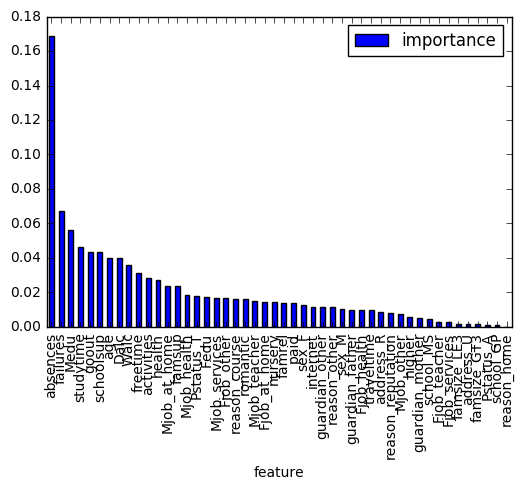

In [9]:
clf_C = GradientBoostingClassifier() #learning_rate=0.01
train_predict(clf, X_train, y_train, X_test, y_test)
clf_C.fit(X_train, y_train)
Feature_Importance = pd.DataFrame(zip(X_train.columns, clf_C.feature_importances_), columns=['feature', 'importance']).sort('importance', ascending = False)

#print Feature_Importance
import matplotlib.pyplot as plt
%matplotlib inline
Feature_Importance.plot(kind='bar',x="feature", y ="importance")

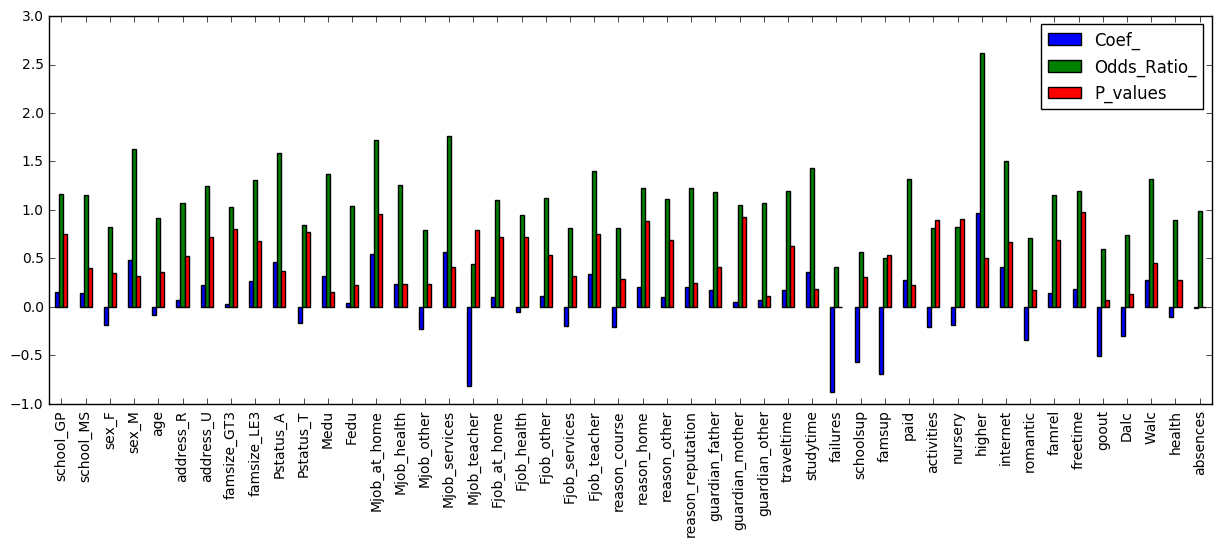

In [10]:
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
scores, pvalues = chi2(X_train, y_train)
coef = pd.DataFrame(zip(clf.coef_.T, np.exp(clf.coef_).T))
coef.columns = ['Coef_','Odds_Ratio_']
coef['P_values'] = pvalues
coef.index = X_train.columns

coef.Coef_ = coef.Coef_.astype(np.float64)
coef.Odds_Ratio_ = coef.Odds_Ratio_.astype(np.float64)

#print coef

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
plt.figure(); 
coef.plot(kind='bar');

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer:** The model is able to predict how likely a student is to graduate. It does so by analysing the 395 student data, that already went through the program. By looking at the attributes of these students, it identifies cues that have been idicative for failing to graduate in the past. We can look for these cues in future students to get our intervention system. 

 To get a feeling for how the model works, consider this situation, imaging you record two attributes for your students:
goout: how much they go out with friends (the higher the value, the more they tend to go out)
failures: how often they failed to pass a class before (the higher the value, the more often they failed before)
You would probably expect both numbers to drive the chance of failing to graduate. Similar to these 2 parameters, we have combined various parameters to define this model, which predicts the chance of a student passing or failing, based on the input parameters of the test student.

   After the initial training using the training data, Logistic Regression gives each feature a weight, as to which is important, odds of a student graduating (can be seen in the above graph). When we are predicting we take all feature values and use the weights generated to access each feature of the new student. We then sum up all the results. This final result is applied to a special function called Sigmoid/Logistic function, if the sum is less than threshold (0), student might not graduate, else the student would probably graduate, also the system would learn from this new students data and become more intelligent over time.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'

# TODO: Create the parameters list you wish to tune
parameters = None

# TODO: Initialize the classifier
clf = None

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = None

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = None

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = None

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.